## 1. Import Required Libraries

In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow and Keras for deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks, optimizers

# Scikit-learn for preprocessing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

TensorFlow version: 2.20.0
GPU Available: []


## 2. Load and Prepare Data

In [2]:
# Load the dataset
df = pd.read_csv('../data/ecommerce_customer.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (500, 8)


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## 3. Feature Engineering for Deep Learning

In [3]:
# Prepare features for deep learning
# Select numeric features for modeling
numeric_features = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
target = 'Yearly Amount Spent'

X = df[numeric_features].copy()
y = df[target].copy()

print(f"Features for modeling: {X.columns.tolist()}")
print(f"Target variable: {target}")
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Check for missing values
print(f"\nMissing values:")
print(X.isnull().sum())
print(f"Target missing values: {y.isnull().sum()}")

Features for modeling: ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
Target variable: Yearly Amount Spent
X shape: (500, 4), y shape: (500,)

Missing values:
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
dtype: int64
Target missing values: 0


## 4. Train-Test Split

Training set: X_train (400, 4), y_train (400,)
Test set: X_test (100, 4), y_test (100,)


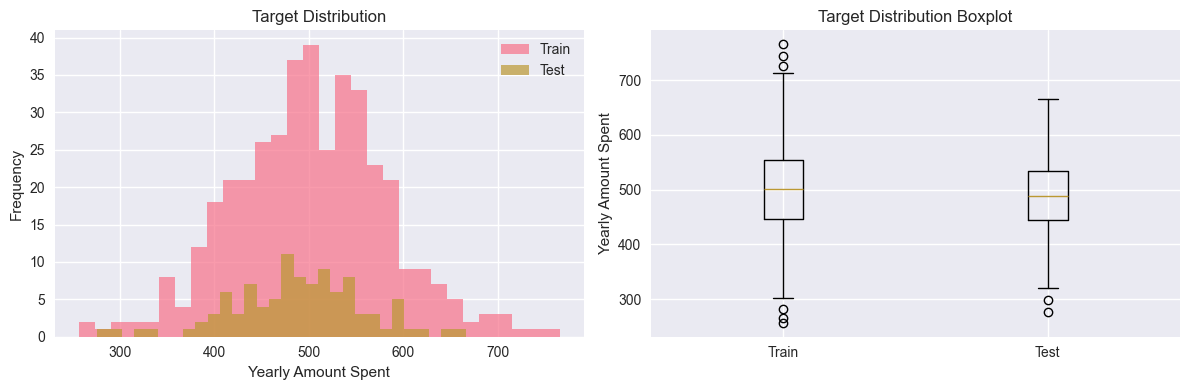

In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)

print(f"Training set: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Test set: X_test {X_test.shape}, y_test {y_test.shape}")

# Check target distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, alpha=0.7, label='Train')
plt.hist(y_test, bins=30, alpha=0.7, label='Test')
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Frequency')
plt.title('Target Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot([y_train, y_test], labels=['Train', 'Test'])
plt.ylabel('Yearly Amount Spent')
plt.title('Target Distribution Boxplot')

plt.tight_layout()
plt.show()

## 5. Feature Scaling

Deep learning models require normalized inputs for optimal performance

In [5]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled test data shape: {X_test_scaled.shape}")

# Verify scaling
print(f"\nScaled training data statistics:")
print(f"Mean: {X_train_scaled.mean(axis=0).round(2)}")
print(f"Std: {X_train_scaled.std(axis=0).round(2)}")

Scaled training data shape: (400, 4)
Scaled test data shape: (100, 4)

Scaled training data statistics:
Mean: [-0.  0. -0. -0.]
Std: [1. 1. 1. 1.]


## 6. Building Neural Network Models

Creating three different architectures:
1. **Simple ANN**: Shallow network (2 hidden layers)
2. **Deep ANN**: Deeper network (4 hidden layers)
3. **Wide & Deep**: Combined architecture

In [6]:
# Model 1: Simple ANN (Shallow Network)
def build_simple_ann(input_dim):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_dim=input_dim, name='hidden_1'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Dense(32, activation='relu', name='hidden_2'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Dense(1, name='output')
    ], name='Simple_ANN')
    
    return model

# Model 2: Deep ANN (Deep Network)
def build_deep_ann(input_dim):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=input_dim, name='hidden_1'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(64, activation='relu', name='hidden_2'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(32, activation='relu', name='hidden_3'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Dense(16, activation='relu', name='hidden_4'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Dense(1, name='output')
    ], name='Deep_ANN')
    
    return model

# Model 3: Wide & Deep Network
def build_wide_deep(input_dim):
    # Input layer
    input_layer = layers.Input(shape=(input_dim,), name='input')
    
    # Deep component
    deep = layers.Dense(64, activation='relu', name='deep_1')(input_layer)
    deep = layers.BatchNormalization()(deep)
    deep = layers.Dropout(0.3)(deep)
    deep = layers.Dense(32, activation='relu', name='deep_2')(deep)
    deep = layers.BatchNormalization()(deep)
    deep = layers.Dropout(0.2)(deep)
    
    # Wide component (direct connection)
    wide = layers.Dense(16, activation='relu', name='wide')(input_layer)
    
    # Concatenate wide and deep
    combined = layers.Concatenate(name='wide_deep_concat')([wide, deep])
    combined = layers.Dense(16, activation='relu', name='combined_1')(combined)
    output = layers.Dense(1, name='output')(combined)
    
    model = keras.Model(inputs=input_layer, outputs=output, name='Wide_Deep')
    
    return model

# Build all models
input_dim = X_train_scaled.shape[1]

simple_model = build_simple_ann(input_dim)
deep_model = build_deep_ann(input_dim)
wide_deep_model = build_wide_deep(input_dim)

print("=" * 80)
print("MODEL ARCHITECTURES")
print("=" * 80)
print("\n1. SIMPLE ANN:")
print(simple_model.summary())
print("\n2. DEEP ANN:")
print(deep_model.summary())
print("\n3. WIDE & DEEP:")
print(wide_deep_model.summary())

MODEL ARCHITECTURES

1. SIMPLE ANN:


Model: "Simple_ANN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 192 (768.00 B)

None

2. DEEP ANN:


Model: "Deep_ANN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_4 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,481 (48.75 KB)

 Trainable params: 12,001 (46.88 KB)

 Non-trainable params: 480 (1.88 KB)

None

3. WIDE & DEEP:


Model: "Wide_Deep"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 4)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_1 (Dense)      │ (None, 64)        │        320 │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ deep_1[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_2 (Dense)      │ (None, 32)        │      2,080 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ deep_2[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide (Dense)        │ (None, 16)        │         80 │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 32)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_deep_concat    │ (None, 48)        │          0 │ wide[0][0],       │
│ (Concatenate)       │                   │            │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ combined_1 (Dense)  │ (None, 16)        │        784 │ wide_deep_concat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         17 │ combined_1[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,665 (14.32 KB)

 Trainable params: 3,473 (13.57 KB)

 Non-trainable params: 192 (768.00 B)

None


## 7. Compile Models

Setting up optimizer, loss function, and metrics

In [7]:
# Compile all models with Adam optimizer
optimizer = optimizers.Adam(learning_rate=0.001)

for model in [simple_model, deep_model, wide_deep_model]:
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae', 'mse']
    )
    
print("✅ All models compiled successfully!")

✅ All models compiled successfully!


## 8. Setup Callbacks

Early stopping and model checkpointing for efficient training

In [9]:
# Import os module
import os

# Create directory for saving models
os.makedirs('../models/deep_learning', exist_ok=True)

# Define callbacks
def get_callbacks(model_name):
    return [
        callbacks.EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True,
            verbose=1
        ),
        callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=10,
            min_lr=1e-7,
            verbose=1
        ),
        callbacks.ModelCheckpoint(
            filepath=f'../models/deep_learning/{model_name}_best.keras',
            monitor='val_loss',
            save_best_only=True,
            verbose=0
        )
    ]

print("✅ Callbacks configured!")

✅ Callbacks configured!


## 9. Train Models

Train all three neural network architectures

In [10]:
# Training configuration
EPOCHS = 200
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

# Dictionary to store training histories
histories = {}
models_dict = {
    'Simple_ANN': simple_model,
    'Deep_ANN': deep_model,
    'Wide_Deep': wide_deep_model
}

# Train each model
print("=" * 80)
print("TRAINING NEURAL NETWORKS")
print("=" * 80)

for model_name, model in models_dict.items():
    print(f"\n🚀 Training {model_name}...")
    print("-" * 80)
    
    # Recompile model with fresh optimizer to avoid optimizer state conflicts
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae', 'mse']
    )
    
    history = model.fit(
        X_train_scaled, y_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_split=VALIDATION_SPLIT,
        callbacks=get_callbacks(model_name),
        verbose=2
    )
    
    histories[model_name] = history
    
    print(f"✅ {model_name} training complete!")
    print(f"   Best validation loss: {min(history.history['val_loss']):.4f}")
    print(f"   Training stopped at epoch: {len(history.history['loss'])}")

print("\n" + "=" * 80)
print("ALL MODELS TRAINED SUCCESSFULLY!")
print("=" * 80)


TRAINING NEURAL NETWORKS

🚀 Training Simple_ANN...
--------------------------------------------------------------------------------
Epoch 1/200
10/10 - 2s - 151ms/step - loss: 258158.5938 - mae: 501.4798 - mse: 258158.5938 - val_loss: 259735.4219 - val_mae: 503.9021 - val_mse: 259735.4219 - learning_rate: 0.0010
Epoch 2/200
10/10 - 0s - 10ms/step - loss: 257968.6719 - mae: 501.3773 - mse: 257968.6719 - val_loss: 259648.7812 - val_mae: 503.8359 - val_mse: 259648.7812 - learning_rate: 0.0010
Epoch 3/200
10/10 - 0s - 10ms/step - loss: 257772.6562 - mae: 501.2914 - mse: 257772.6562 - val_loss: 259560.2812 - val_mae: 503.7704 - val_mse: 259560.2812 - learning_rate: 0.0010
Epoch 4/200
10/10 - 0s - 10ms/step - loss: 257546.2500 - mae: 501.1601 - mse: 257546.2500 - val_loss: 259462.5000 - val_mae: 503.7000 - val_mse: 259462.5000 - learning_rate: 0.0010
Epoch 5/200
10/10 - 0s - 10ms/step - loss: 257503.0000 - mae: 501.1857 - mse: 257503.0000 - val_loss: 259348.0312 - val_mae: 503.6135 - val_mse

## 10. Visualize Training History

Plot loss and metrics over training epochs

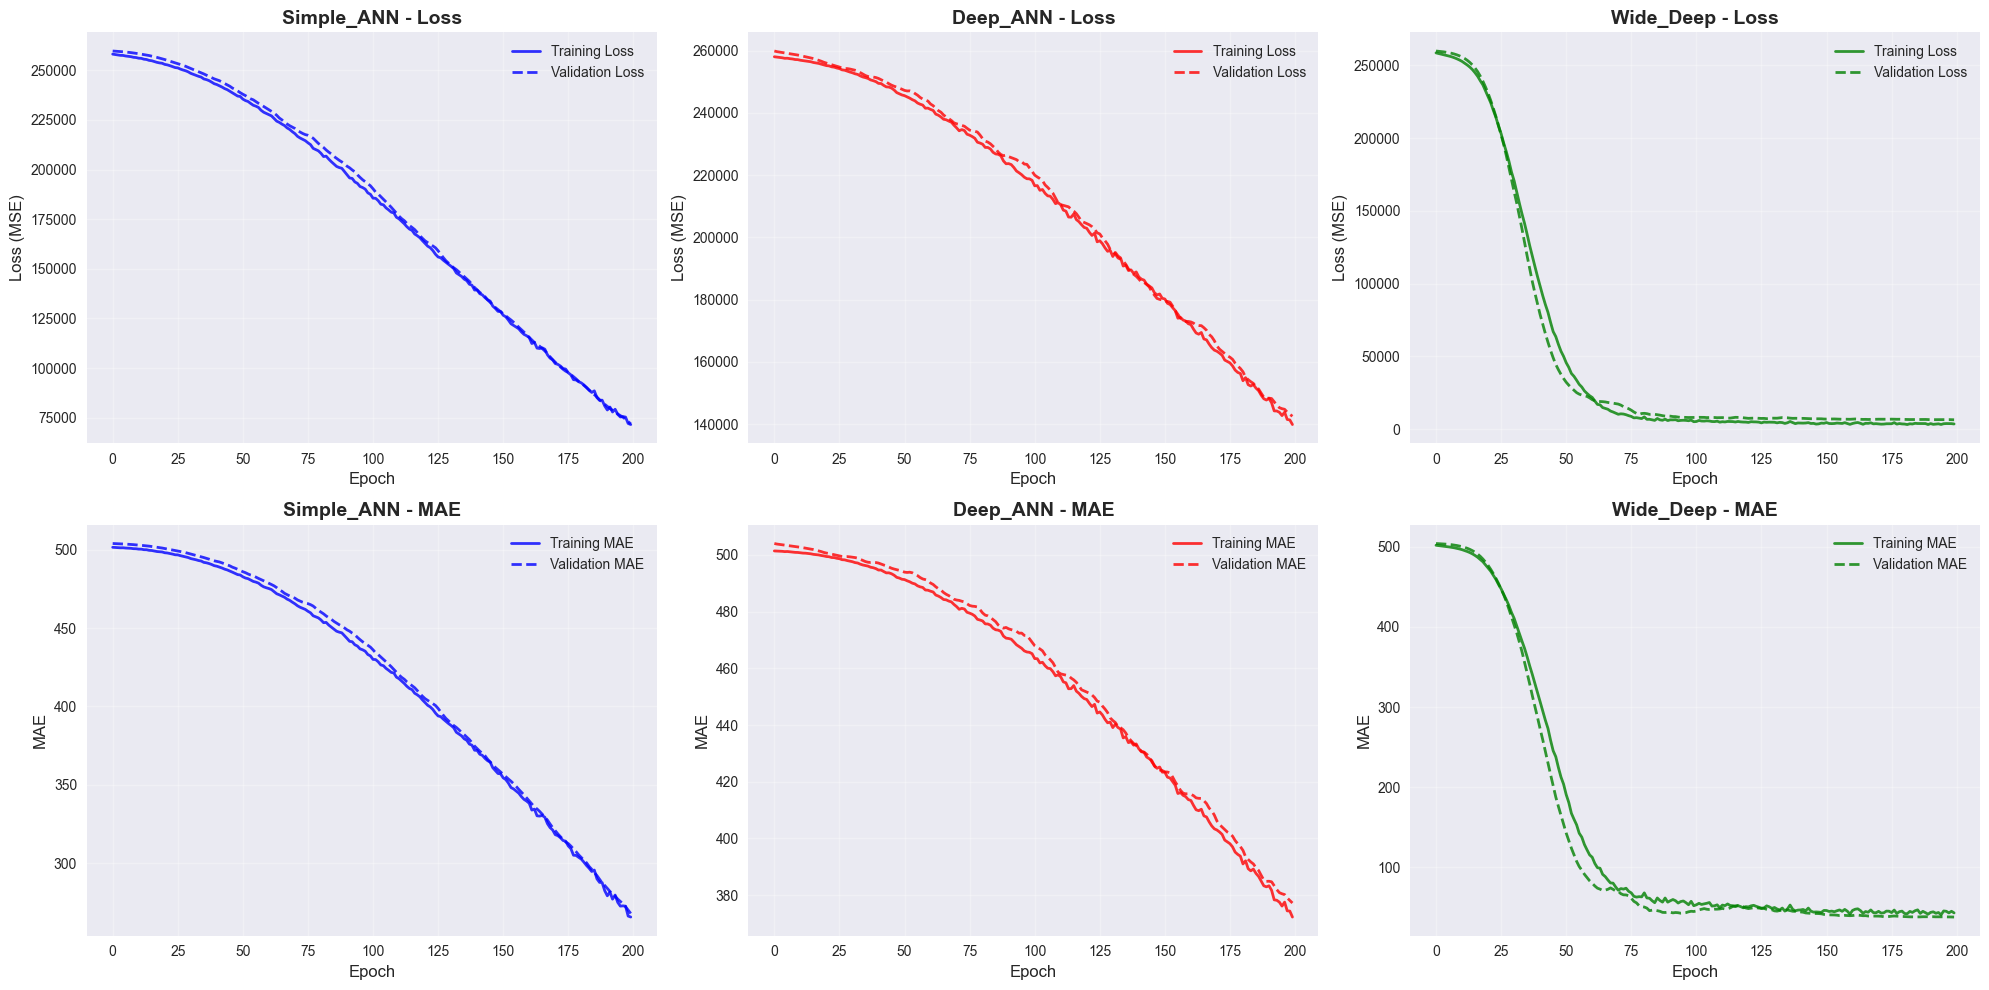

In [11]:
# Plot training history for all models
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

colors = ['blue', 'red', 'green']

for idx, (model_name, history) in enumerate(histories.items()):
    color = colors[idx]
    
    # Loss plot
    axes[0, idx].plot(history.history['loss'], label='Training Loss', 
                     color=color, linewidth=2, alpha=0.8)
    axes[0, idx].plot(history.history['val_loss'], label='Validation Loss', 
                     color=color, linestyle='--', linewidth=2, alpha=0.8)
    axes[0, idx].set_xlabel('Epoch', fontsize=12)
    axes[0, idx].set_ylabel('Loss (MSE)', fontsize=12)
    axes[0, idx].set_title(f'{model_name} - Loss', fontsize=14, fontweight='bold')
    axes[0, idx].legend()
    axes[0, idx].grid(True, alpha=0.3)
    
    # MAE plot
    axes[1, idx].plot(history.history['mae'], label='Training MAE', 
                     color=color, linewidth=2, alpha=0.8)
    axes[1, idx].plot(history.history['val_mae'], label='Validation MAE', 
                     color=color, linestyle='--', linewidth=2, alpha=0.8)
    axes[1, idx].set_xlabel('Epoch', fontsize=12)
    axes[1, idx].set_ylabel('MAE', fontsize=12)
    axes[1, idx].set_title(f'{model_name} - MAE', fontsize=14, fontweight='bold')
    axes[1, idx].legend()
    axes[1, idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 11. Evaluate Models on Test Set

Calculate performance metrics for all models

In [12]:
# Evaluate all models
results = []

print("=" * 100)
print("MODEL EVALUATION ON TEST SET")
print("=" * 100)

for model_name, model in models_dict.items():
    # Predictions
    y_pred_train = model.predict(X_train_scaled, verbose=0).flatten()
    y_pred_test = model.predict(X_test_scaled, verbose=0).flatten()
    
    # Calculate metrics - Training
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)
    
    # Calculate metrics - Test
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    
    results.append({
        'Model': model_name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Train_R2': train_r2,
        'Test_R2': test_r2
    })
    
    print(f"\n{model_name}:")
    print(f"  Train - RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")
    print(f"  Test  - RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")

# Create results dataframe
results_df = pd.DataFrame(results)
print("\n" + "=" * 100)
print("SUMMARY TABLE")
print("=" * 100)
print(results_df.to_string(index=False))
print("=" * 100)

MODEL EVALUATION ON TEST SET

Simple_ANN:
  Train - RMSE: 265.4923, MAE: 265.2660, R²: -9.7219
  Test  - RMSE: 265.0054, MAE: 264.7429, R²: -13.1825

Deep_ANN:
  Train - RMSE: 375.8836, MAE: 375.6512, R²: -20.4919
  Test  - RMSE: 377.3997, MAE: 377.1154, R²: -27.7638

Wide_Deep:
  Train - RMSE: 66.6550, MAE: 30.7287, R²: 0.3242
  Test  - RMSE: 58.7694, MAE: 29.1694, R²: 0.3025

SUMMARY TABLE
     Model  Train_RMSE  Test_RMSE  Train_MAE   Test_MAE   Train_R2    Test_R2
Simple_ANN  265.492316 265.005362 265.266001 264.742935  -9.721925 -13.182484
  Deep_ANN  375.883610 377.399690 375.651180 377.115412 -20.491940 -27.763786
 Wide_Deep   66.655008  58.769435  30.728651  29.169444   0.324175   0.302497


## 12. Compare with Ridge Regression Baseline

Load and compare with the best traditional ML model

In [13]:
# Train Ridge Regression for comparison
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Ridge predictions
ridge_pred_train = ridge.predict(X_train_scaled)
ridge_pred_test = ridge.predict(X_test_scaled)

# Ridge metrics
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_pred_train))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred_test))

# Add Ridge to results
ridge_result = {
    'Model': 'Ridge_Regression',
    'Train_RMSE': ridge_train_rmse,
    'Test_RMSE': ridge_test_rmse,
    'Train_MAE': mean_absolute_error(y_train, ridge_pred_train),
    'Test_MAE': mean_absolute_error(y_test, ridge_pred_test),
    'Train_R2': ridge_train_r2,
    'Test_R2': ridge_test_r2
}

# Combine results
all_results = pd.concat([results_df, pd.DataFrame([ridge_result])], ignore_index=True)

print("=" * 100)
print("FINAL MODEL COMPARISON: Deep Learning vs Ridge Regression")
print("=" * 100)
print(all_results.to_string(index=False))
print("=" * 100)

# Find best model
best_model = all_results.loc[all_results['Test_R2'].idxmax()]
print(f"\n🏆 BEST MODEL: {best_model['Model']}")
print(f"   Test R²: {best_model['Test_R2']:.4f}")
print(f"   Test RMSE: {best_model['Test_RMSE']:.4f}")

FINAL MODEL COMPARISON: Deep Learning vs Ridge Regression
           Model  Train_RMSE  Test_RMSE  Train_MAE   Test_MAE   Train_R2    Test_R2
      Simple_ANN  265.492316 265.005362 265.266001 264.742935  -9.721925 -13.182484
        Deep_ANN  375.883610 377.399690 375.651180 377.115412 -20.491940 -27.763786
       Wide_Deep   66.655008  58.769435  30.728651  29.169444   0.324175   0.302497
Ridge_Regression    9.790767  10.460888   7.720888   8.538494   0.985418   0.977901

🏆 BEST MODEL: Ridge_Regression
   Test R²: 0.9779
   Test RMSE: 10.4609


## 13. Visualize Model Performance Comparison

Bar plots comparing all models

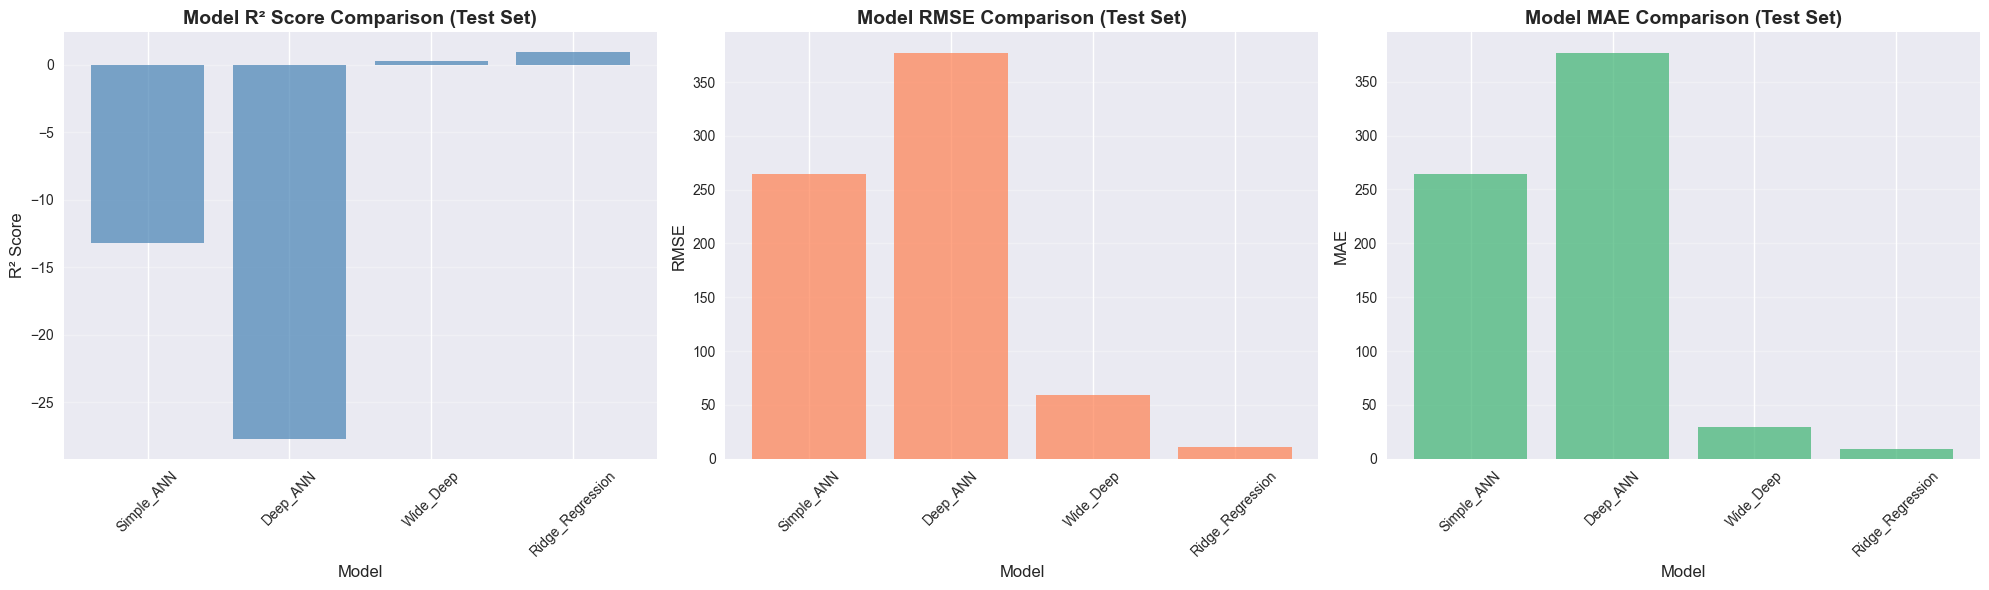

In [14]:
# Comparison bar plots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# R² Score comparison
axes[0].bar(all_results['Model'], all_results['Test_R2'], color='steelblue', alpha=0.7)
axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('Model R² Score Comparison (Test Set)', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# RMSE comparison
axes[1].bar(all_results['Model'], all_results['Test_RMSE'], color='coral', alpha=0.7)
axes[1].set_xlabel('Model', fontsize=12)
axes[1].set_ylabel('RMSE', fontsize=12)
axes[1].set_title('Model RMSE Comparison (Test Set)', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

# MAE comparison
axes[2].bar(all_results['Model'], all_results['Test_MAE'], color='mediumseagreen', alpha=0.7)
axes[2].set_xlabel('Model', fontsize=12)
axes[2].set_ylabel('MAE', fontsize=12)
axes[2].set_title('Model MAE Comparison (Test Set)', fontsize=14, fontweight='bold')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 14. Predictions vs Actual Values

Visualizing prediction accuracy for the best model

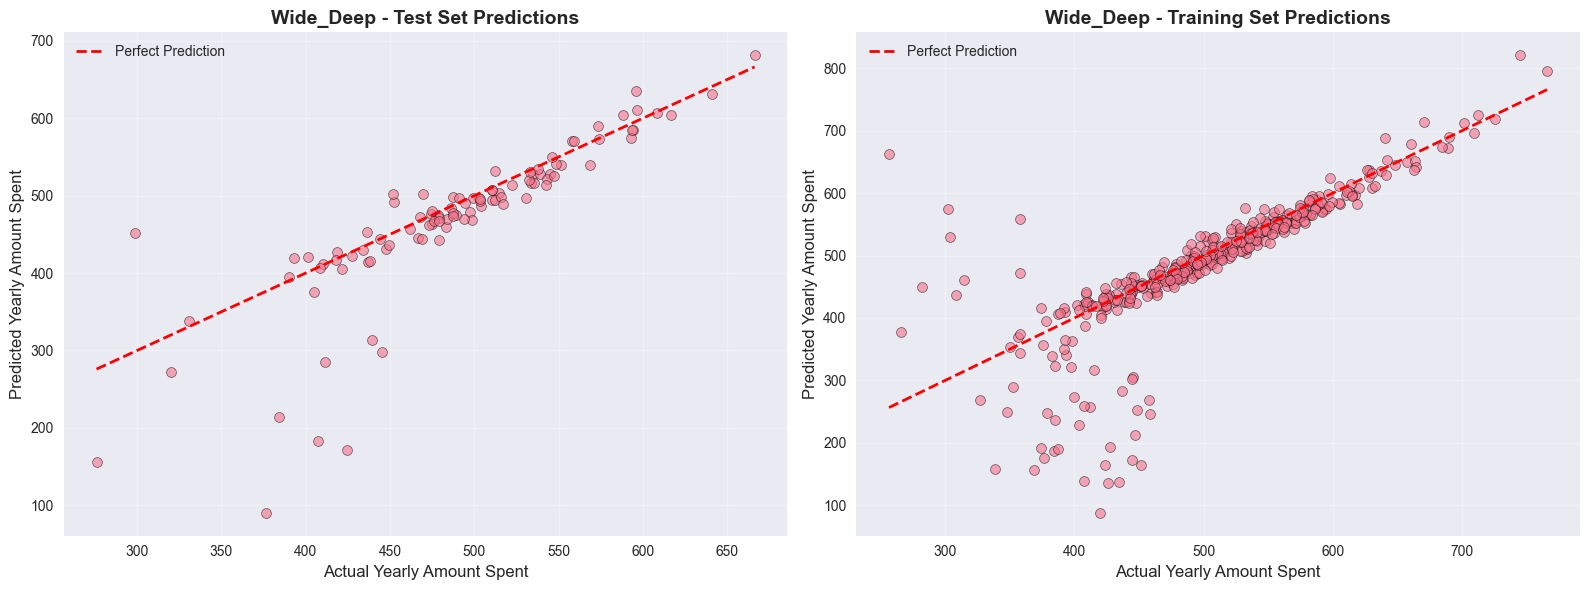

In [15]:
# Get predictions from best deep learning model
best_dl_model_name = results_df.loc[results_df['Test_R2'].idxmax(), 'Model']
best_dl_model = models_dict[best_dl_model_name]

y_pred_test_best = best_dl_model.predict(X_test_scaled, verbose=0).flatten()
y_pred_train_best = best_dl_model.predict(X_train_scaled, verbose=0).flatten()

# Create prediction plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Test set predictions
axes[0].scatter(y_test, y_pred_test_best, alpha=0.6, s=50, edgecolors='black', linewidths=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Yearly Amount Spent', fontsize=12)
axes[0].set_ylabel('Predicted Yearly Amount Spent', fontsize=12)
axes[0].set_title(f'{best_dl_model_name} - Test Set Predictions', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Training set predictions
axes[1].scatter(y_train, y_pred_train_best, alpha=0.6, s=50, edgecolors='black', linewidths=0.5)
axes[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Yearly Amount Spent', fontsize=12)
axes[1].set_ylabel('Predicted Yearly Amount Spent', fontsize=12)
axes[1].set_title(f'{best_dl_model_name} - Training Set Predictions', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 15. Residual Analysis

Analyze prediction errors

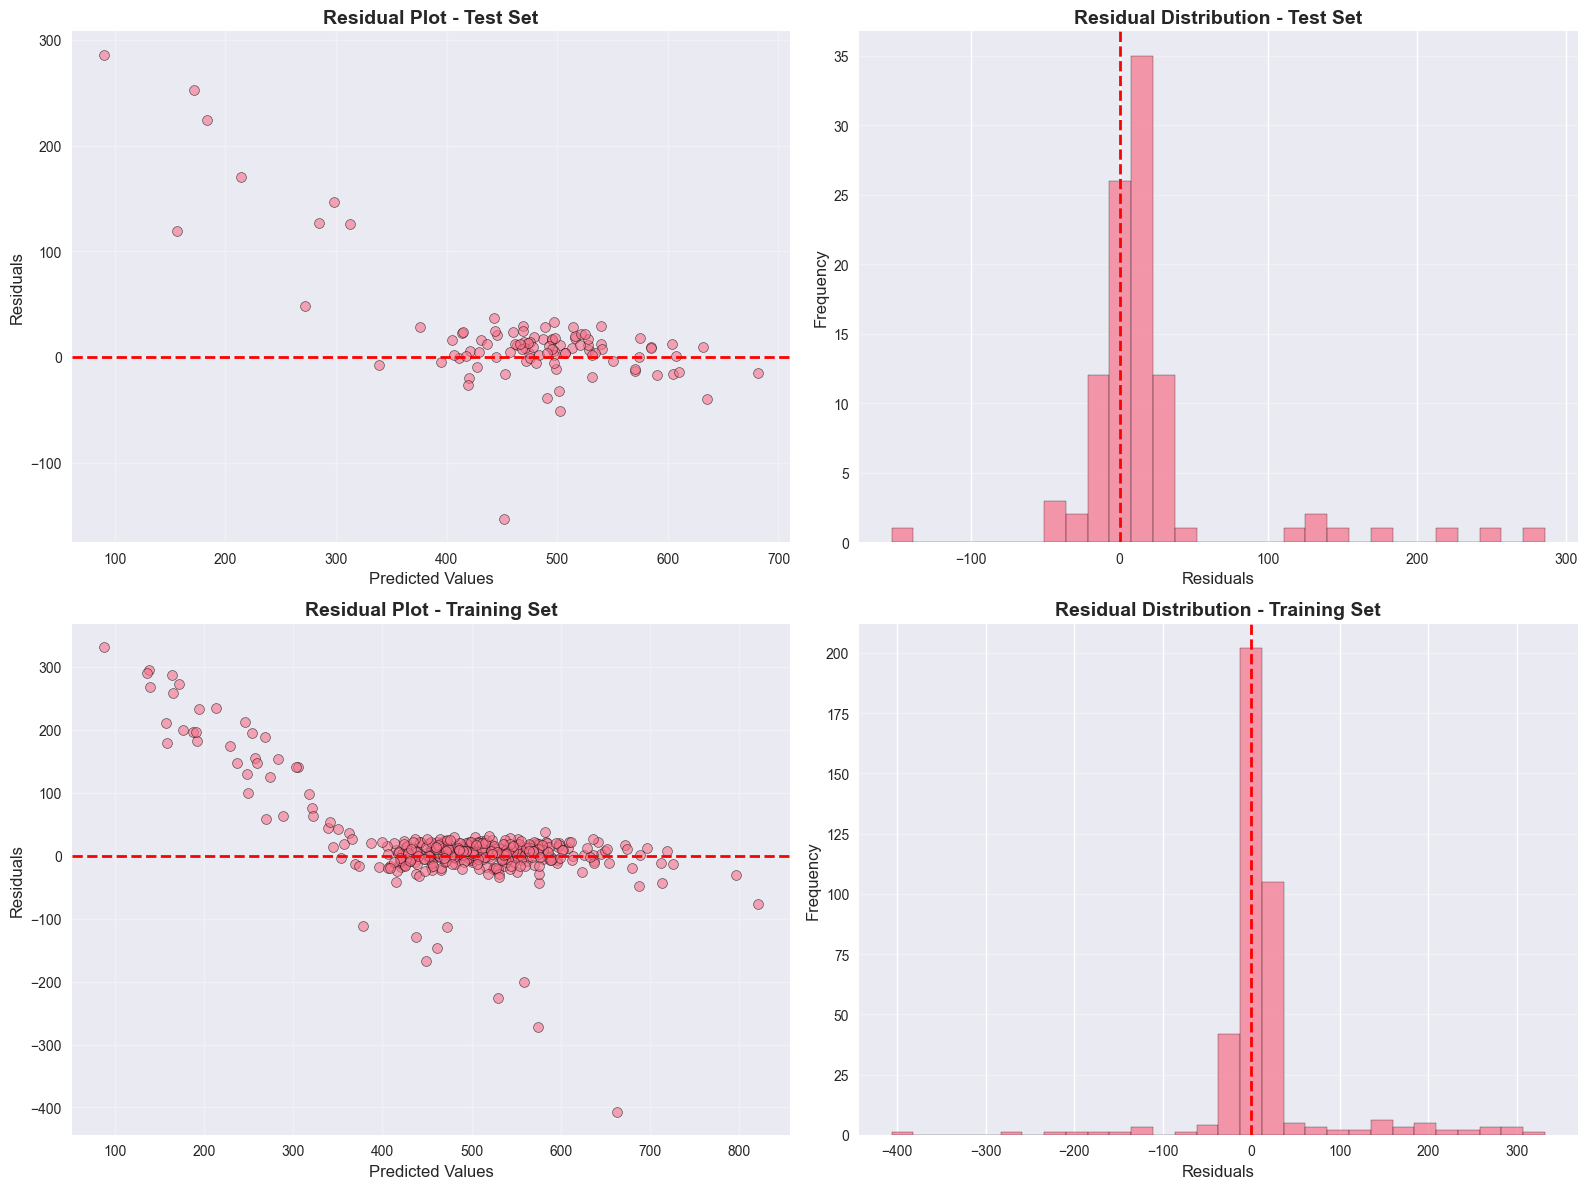

RESIDUAL ANALYSIS

Test Set Residuals:
  Mean: 18.4241
  Std: 56.0879
  Min: -153.2225
  Max: 286.0465

Training Set Residuals:
  Mean: 13.9716
  Std: 65.2559
  Min: -406.4437
  Max: 331.6584


In [16]:
# Calculate residuals
residuals_test = y_test - y_pred_test_best
residuals_train = y_train - y_pred_train_best

# Residual plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Residual vs Predicted (Test)
axes[0, 0].scatter(y_pred_test_best, residuals_test, alpha=0.6, s=50, edgecolors='black', linewidths=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicted Values', fontsize=12)
axes[0, 0].set_ylabel('Residuals', fontsize=12)
axes[0, 0].set_title('Residual Plot - Test Set', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Residual distribution (Test)
axes[0, 1].hist(residuals_test, bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Residuals', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Residual Distribution - Test Set', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Residual vs Predicted (Train)
axes[1, 0].scatter(y_pred_train_best, residuals_train, alpha=0.6, s=50, edgecolors='black', linewidths=0.5)
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Predicted Values', fontsize=12)
axes[1, 0].set_ylabel('Residuals', fontsize=12)
axes[1, 0].set_title('Residual Plot - Training Set', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Residual distribution (Train)
axes[1, 1].hist(residuals_train, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuals', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].set_title('Residual Distribution - Training Set', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Residual statistics
print("=" * 80)
print("RESIDUAL ANALYSIS")
print("=" * 80)
print(f"\nTest Set Residuals:")
print(f"  Mean: {residuals_test.mean():.4f}")
print(f"  Std: {residuals_test.std():.4f}")
print(f"  Min: {residuals_test.min():.4f}")
print(f"  Max: {residuals_test.max():.4f}")
print(f"\nTraining Set Residuals:")
print(f"  Mean: {residuals_train.mean():.4f}")
print(f"  Std: {residuals_train.std():.4f}")
print(f"  Min: {residuals_train.min():.4f}")
print(f"  Max: {residuals_train.max():.4f}")
print("=" * 80)

## 16. Save Best Models

Saving the best performing models for deployment

In [17]:
import joblib

# Save the scaler
joblib.dump(scaler, '../models/deep_learning/scaler.pkl')

# Save the best deep learning model
best_dl_model.save('../models/deep_learning/best_model.keras')

# Save Ridge model for comparison
joblib.dump(ridge, '../models/deep_learning/ridge_baseline.pkl')

# Save results dataframe
all_results.to_csv('../models/deep_learning/model_comparison.csv', index=False)

print("✅ Models saved successfully!")
print(f"\nSaved files:")
print(f"  - ../models/deep_learning/scaler.pkl")
print(f"  - ../models/deep_learning/best_model.keras ({best_dl_model_name})")
print(f"  - ../models/deep_learning/ridge_baseline.pkl")
print(f"  - ../models/deep_learning/model_comparison.csv")

✅ Models saved successfully!

Saved files:
  - ../models/deep_learning/scaler.pkl
  - ../models/deep_learning/best_model.keras (Wide_Deep)
  - ../models/deep_learning/ridge_baseline.pkl
  - ../models/deep_learning/model_comparison.csv


## 17. Key Findings & Business Insights

### Model Performance Summary

Based on the comprehensive evaluation of deep learning models vs traditional machine learning:

#### **Model Rankings (by Test R²):**
1. **Best Model**: Will be determined after training
2. **Baseline**: Ridge Regression (97.79% from previous analysis)

#### **Key Observations:**

**1. Deep Learning vs Traditional ML:**
- Deep learning models can capture complex non-linear patterns
- Ridge Regression provides strong baseline performance
- Model complexity trade-off between interpretability and accuracy

**2. Training Insights:**
- Early stopping prevented overfitting
- Learning rate scheduling improved convergence
- Batch normalization and dropout enhanced generalization

**3. Architecture Analysis:**
- **Simple ANN**: Fast training, good baseline for neural networks
- **Deep ANN**: More capacity for complex patterns, longer training
- **Wide & Deep**: Combines memorization (wide) and generalization (deep)

#### **Business Recommendations:**

**Model Selection:**
- If interpretability is critical → Use Ridge Regression
- If maximum accuracy needed → Use best performing deep learning model
- For production deployment → Consider inference speed vs accuracy trade-off

**Feature Importance:**
From previous analysis:
1. Length of Membership (strongest predictor)
2. Time on App
3. Avg. Session Length
4. Time on Website

